In [978]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [979]:
from sklearn.linear_model import LogisticRegression

In [980]:
from sklearn.tree import DecisionTreeClassifier

In [981]:
from sklearn.ensemble import RandomForestClassifier

In [982]:
from sklearn.svm import SVC

In [983]:
from sklearn.neighbors import KNeighborsClassifier

In [984]:
from sklearn.preprocessing import StandardScaler

In [985]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report 

In [986]:
from sklearn.metrics import confusion_matrix

In [987]:
df=pd.read_csv('winequality.csv')

In [988]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [989]:
df.shape

(1599, 12)

In [990]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Cleaning

In [991]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [992]:
# no null values

## EDA

In [993]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [994]:
df.groupby('quality')['fixed acidity'].mean().sort_values()

quality
4    7.779245
5    8.167254
6    8.347179
3    8.360000
8    8.566667
7    8.872362
Name: fixed acidity, dtype: float64

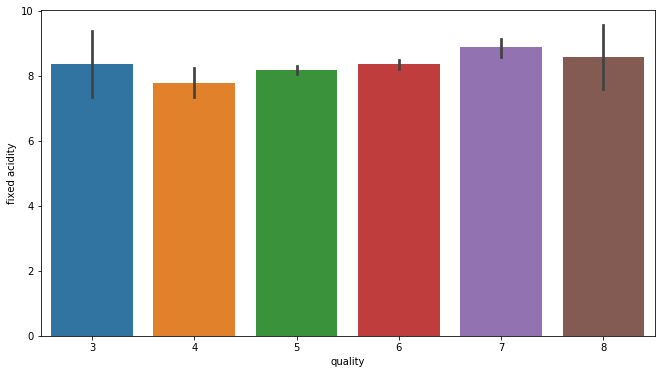

In [995]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='fixed acidity', data=df)

In [996]:
df.groupby('quality')['volatile acidity'].mean().sort_values()

quality
7    0.403920
8    0.423333
6    0.497484
5    0.577041
4    0.693962
3    0.884500
Name: volatile acidity, dtype: float64

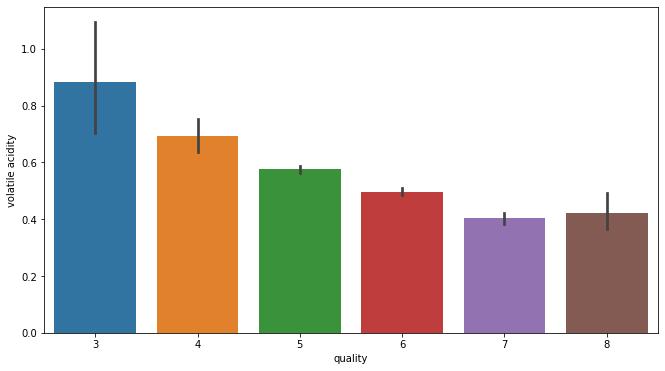

In [997]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='volatile acidity', data=df)

In [998]:
df.groupby('quality')['citric acid'].mean().sort_values()

quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric acid, dtype: float64

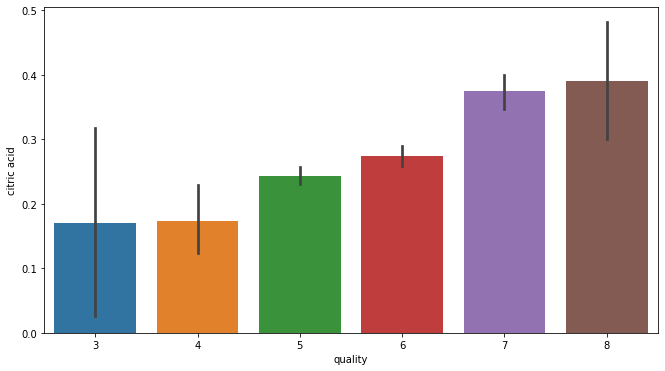

In [999]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='citric acid', data=df)

In [1000]:
df.groupby('quality')['residual sugar'].mean().sort_values()

quality
6    2.477194
5    2.528855
8    2.577778
3    2.635000
4    2.694340
7    2.720603
Name: residual sugar, dtype: float64

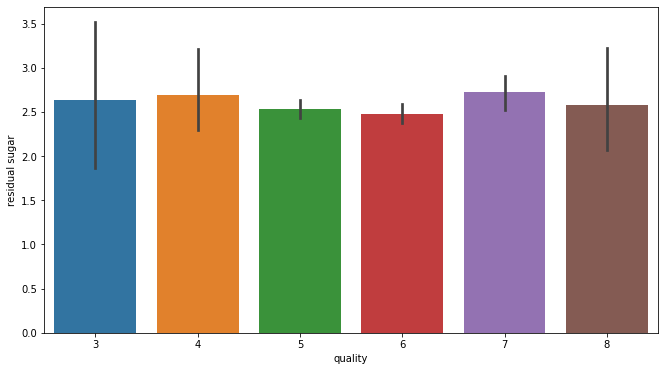

In [1001]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='residual sugar', data=df)

In [1002]:
df.groupby('quality')['chlorides'].mean().sort_values()

quality
8    0.068444
7    0.076588
6    0.084956
4    0.090679
5    0.092736
3    0.122500
Name: chlorides, dtype: float64

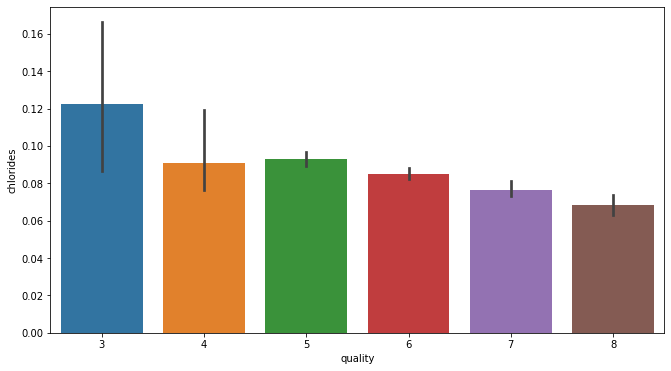

In [1003]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='chlorides', data=df)

In [1004]:
df.groupby('quality')['free sulfur dioxide'].mean().sort_values()

quality
3    11.000000
4    12.264151
8    13.277778
7    14.045226
6    15.711599
5    16.983847
Name: free sulfur dioxide, dtype: float64

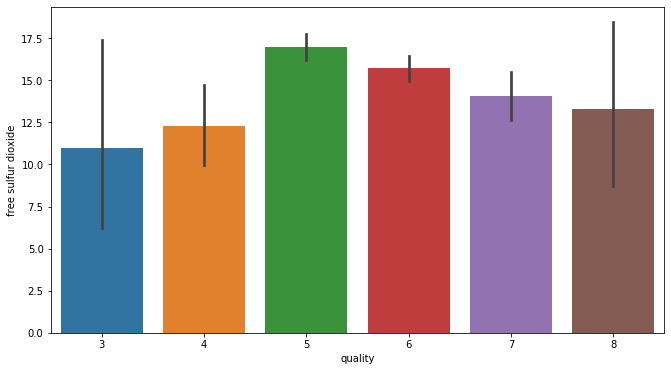

In [1005]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

In [1006]:
df.groupby('quality')['total sulfur dioxide'].mean().sort_values()

quality
3    24.900000
8    33.444444
7    35.020101
4    36.245283
6    40.869906
5    56.513950
Name: total sulfur dioxide, dtype: float64

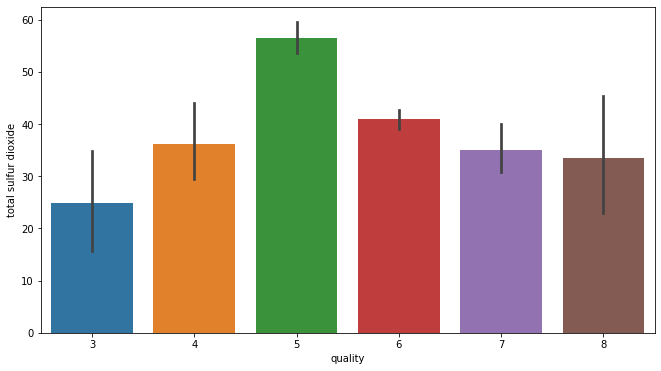

In [1007]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

In [1008]:
df.groupby('quality')['density'].mean().sort_values()

quality
8    0.995212
7    0.996104
4    0.996542
6    0.996615
5    0.997104
3    0.997464
Name: density, dtype: float64

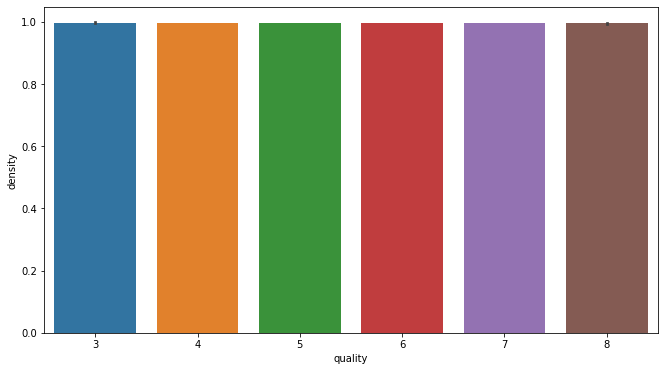

In [1009]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='density', data=df)

In [1010]:
df.groupby('quality')['pH'].mean().sort_values()

quality
8    3.267222
7    3.290754
5    3.304949
6    3.318072
4    3.381509
3    3.398000
Name: pH, dtype: float64

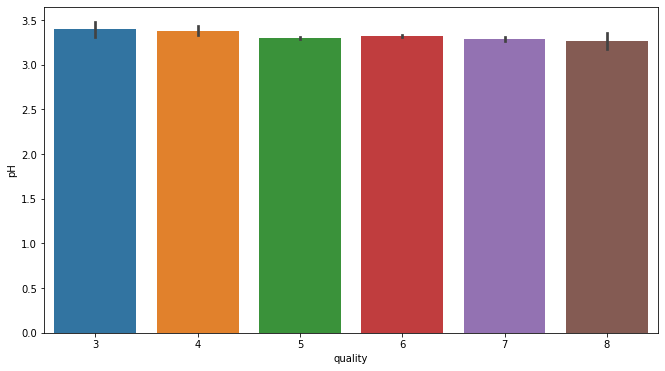

In [1011]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='pH', data=df)

In [1012]:
df.groupby('quality')['sulphates'].mean().sort_values()

quality
3    0.570000
4    0.596415
5    0.620969
6    0.675329
7    0.741256
8    0.767778
Name: sulphates, dtype: float64

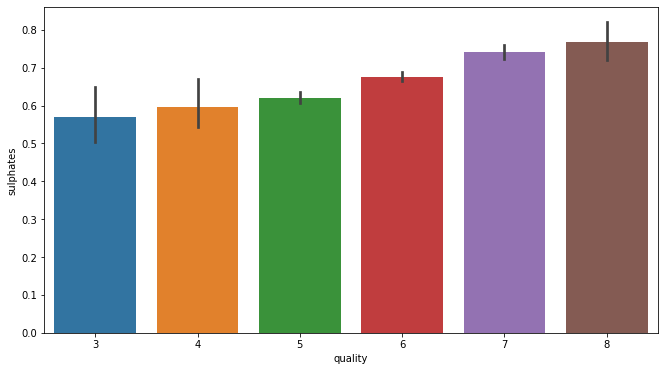

In [1013]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='sulphates', data=df)

In [1014]:
df.groupby('quality')['alcohol'].mean().sort_values()

quality
5     9.899706
3     9.955000
4    10.265094
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

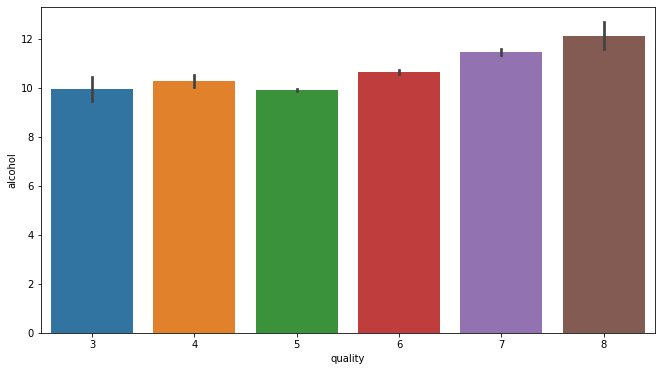

In [1015]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='alcohol', data=df)

In [1016]:
# IT is seen that 7,8 have same features and can be considered as good i.e.(1) and rest as bad i.e.(0)

## Feature Selection

### Checking for correlation 

In [1017]:
corr=df.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [1018]:
print(corr['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [1019]:
from sklearn.ensemble import ExtraTreesClassifier

In [1020]:
cr=ExtraTreesClassifier()

In [1021]:
x=df.drop('quality',axis=1)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [1022]:
y=df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [1023]:
cr.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [1024]:
print(cr.feature_importances_)

[0.07808539 0.09750836 0.07996727 0.07684761 0.07741987 0.07403387
 0.10336146 0.08681695 0.07412981 0.10547336 0.14635605]


In [1025]:
feature_importance=pd.Series(cr.feature_importances_,index=x.columns)
feature_importance.sort_values(ascending=False)

alcohol                 0.146356
sulphates               0.105473
total sulfur dioxide    0.103361
volatile acidity        0.097508
density                 0.086817
citric acid             0.079967
fixed acidity           0.078085
chlorides               0.077420
residual sugar          0.076848
pH                      0.074130
free sulfur dioxide     0.074034
dtype: float64

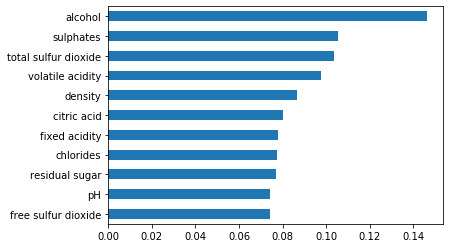

In [1026]:
feature_importance.sort_values(ascending=True).plot(kind='barh')

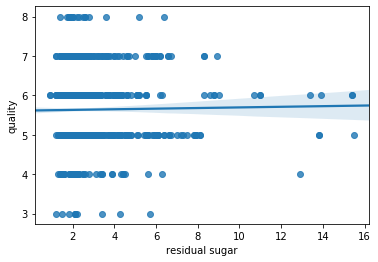

In [1027]:
sns.regplot(x='residual sugar', y='quality' ,data=df)

In [1028]:
# free sulphar dioxide,residual sugar, and ph have least correlation  

In [1029]:
df.drop(['free sulfur dioxide','residual sugar','pH'],inplace=True,axis=1)

In [1030]:
df.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   total sulfur dioxide  density  sulphates  alcohol  quality  
0                  34.0   0.9978       0.56      9.4        5  
1                  67.0   0.9968       0.68      9.8        5  
2                  54.0   0.9970       0.65      9.8        5  
3                  60.0   0.9980       0.58      9.8        6  
4                  34.0   0.9978       0.56      9.4        5

### Changing the value of quality accoriding to EDA

In [1031]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [1032]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [1033]:
def change_quality(x):
    if (x==3 or x==4 or x==5 or x==6):
        return 0
    else:
        return 1

In [1034]:
df['quality']=df['quality'].apply(change_quality)

In [1035]:
df.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   total sulfur dioxide  density  sulphates  alcohol  quality  
0                  34.0   0.9978       0.56      9.4        0  
1                  67.0   0.9968       0.68      9.8        0  
2                  54.0   0.9970       0.65      9.8        0  
3                  60.0   0.9980       0.58      9.8        0  
4                  34.0   0.9978       0.56      9.4        0

In [1036]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Checking For outliers

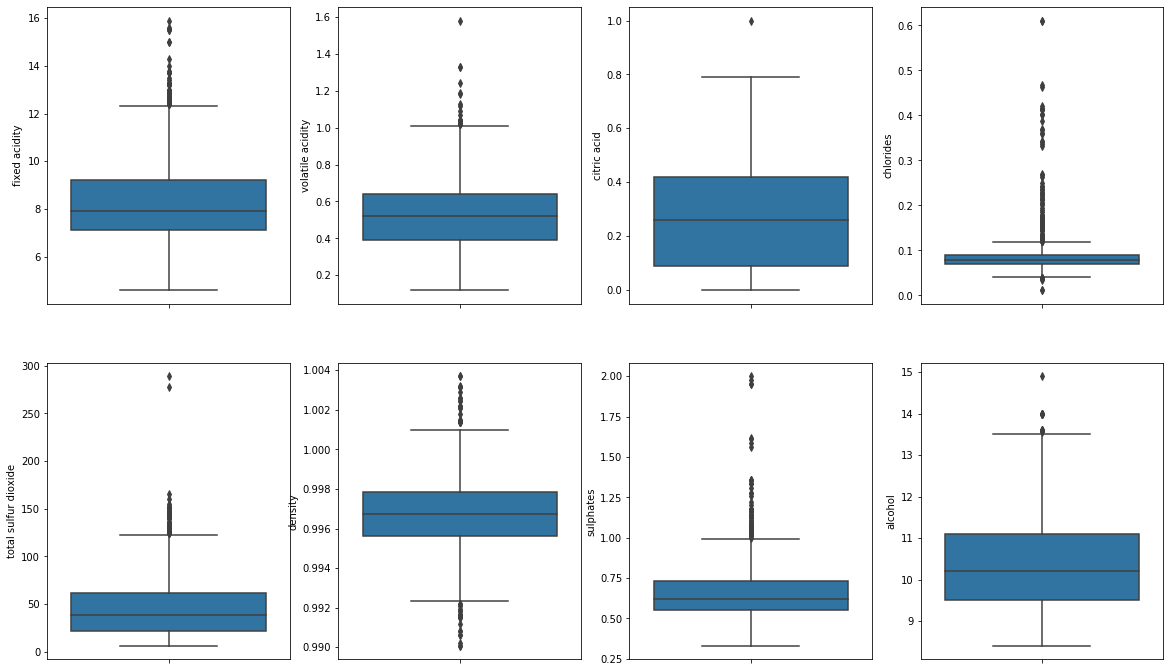

In [1037]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,12))
sns.boxplot(y='fixed acidity',data=df,ax=ax[0][0])
sns.boxplot(y='volatile acidity',data=df,ax=ax[0][1])
sns.boxplot(y='citric acid',data=df,ax=ax[0][2])
sns.boxplot(y='chlorides',data=df,ax=ax[0][3])
sns.boxplot(y='total sulfur dioxide',data=df,ax=ax[1][0])
sns.boxplot(y='density',data=df,ax=ax[1][1])
sns.boxplot(y='sulphates',data=df,ax=ax[1][2])
sns.boxplot(y='alcohol',data=df,ax=ax[1][3])

### Removing Outliers 

In [1038]:
fqt,tqt=np.percentile(df['citric acid'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(1.5*iqr)
print(lb,ub)

-0.4049999999999999 0.9149999999999999


In [1039]:
df.drop(df[df['citric acid']>ub].index,inplace=True)

In [1040]:
fqt,tqt=np.percentile(df['chlorides'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(1.5*iqr)
print(lb,ub)

0.04000000000000002 0.11999999999999998


In [1041]:
df.drop(df[df['chlorides']>0.5].index,inplace=True)

In [1042]:
df.drop(df[df['total sulfur dioxide']>250].index,inplace=True)

In [1043]:
df.drop(df[df['volatile acidity']>1.4].index,inplace=True)

In [1044]:
df.drop(df[df['alcohol']>14].index,inplace=True)

In [1045]:
df.drop(df[df['sulphates']>1.4].index,inplace=True)

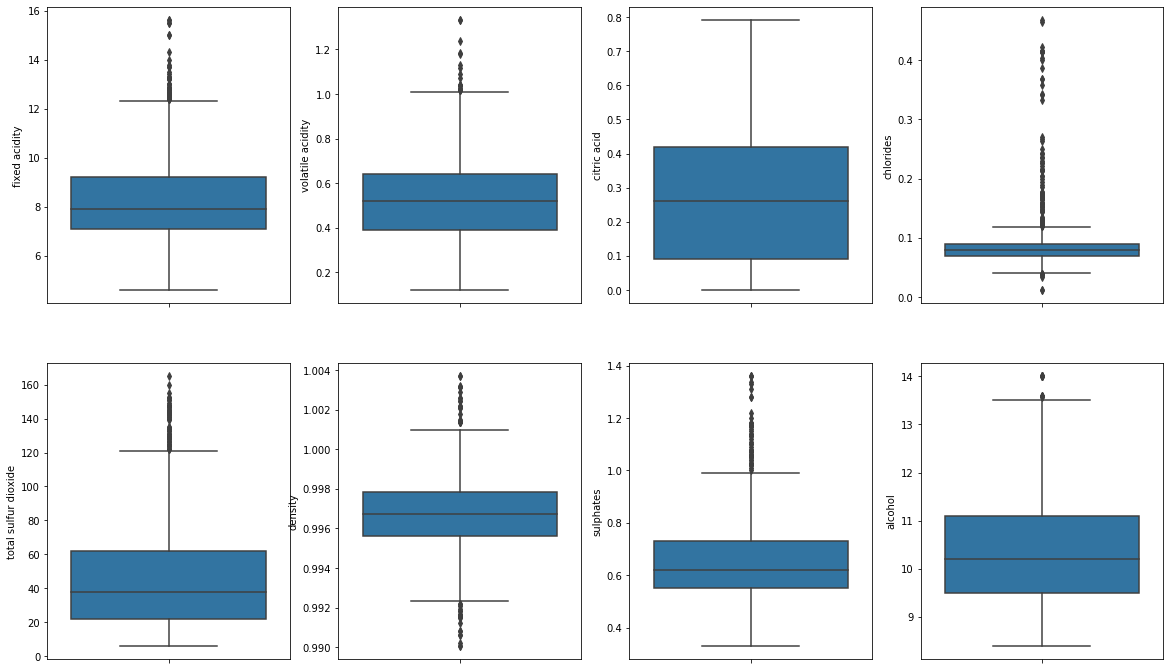

In [1046]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,12))
sns.boxplot(y='fixed acidity',data=df,ax=ax[0][0])
sns.boxplot(y='volatile acidity',data=df,ax=ax[0][1])
sns.boxplot(y='citric acid',data=df,ax=ax[0][2])
sns.boxplot(y='chlorides',data=df,ax=ax[0][3])
sns.boxplot(y='total sulfur dioxide',data=df,ax=ax[1][0])
sns.boxplot(y='density',data=df,ax=ax[1][1])
sns.boxplot(y='sulphates',data=df,ax=ax[1][2])
sns.boxplot(y='alcohol',data=df,ax=ax[1][3])

In [1047]:
df.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   total sulfur dioxide  density  sulphates  alcohol  quality  
0                  34.0   0.9978       0.56      9.4        0  
1                  67.0   0.9968       0.68      9.8        0  
2                  54.0   0.9970       0.65      9.8        0  
3                  60.0   0.9980       0.58      9.8        0  
4                  34.0   0.9978       0.56      9.4        0

In [1048]:
df2=df

In [1049]:
df2.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   total sulfur dioxide  density  sulphates  alcohol  quality  
0                  34.0   0.9978       0.56      9.4        0  
1                  67.0   0.9968       0.68      9.8        0  
2                  54.0   0.9970       0.65      9.8        0  
3                  60.0   0.9980       0.58      9.8        0  
4                  34.0   0.9978       0.56      9.4        0

In [1050]:
df2.shape

(1586, 9)

In [1051]:
cols=['fixed acidity','volatile acidity','citric acid','total sulfur dioxide','density','sulphates','alcohol']

## Feature Scaling

In [1052]:
sc=StandardScaler()

In [1053]:
df2[cols]=sc.fit_transform(df2[cols])

In [1054]:
df2.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0      -0.527768          0.971846    -1.393943      0.076   
1      -0.297400          1.986743    -1.393943      0.098   
2      -0.297400          1.310145    -1.187008      0.092   
3       1.660721         -1.396248     1.503152      0.075   
4      -0.527768          0.971846    -1.393943      0.076   

   total sulfur dioxide   density  sulphates   alcohol  quality  
0             -0.377556  0.556514  -0.621931 -0.965062        0  
1              0.667311  0.026800   0.186359 -0.587500        0  
2              0.255697  0.132743  -0.015714 -0.587500        0  
3              0.445672  0.662457  -0.487216 -0.587500        0  
4             -0.377556  0.556514  -0.621931 -0.965062        0

In [1055]:
x=df2.drop('quality',axis=1)
x

fixed acidity  volatile acidity  citric acid  chlorides  \
0         -0.527768          0.971846    -1.393943      0.076   
1         -0.297400          1.986743    -1.393943      0.098   
2         -0.297400          1.310145    -1.187008      0.092   
3          1.660721         -1.396248     1.503152      0.075   
4         -0.527768          0.971846    -1.393943      0.076   
...             ...               ...          ...        ...   
1594      -1.218869          0.408014    -0.980073      0.090   
1595      -1.391645          0.126098    -0.876605      0.062   
1596      -1.161277         -0.099435    -0.721403      0.076   
1597      -1.391645          0.661738    -0.773137      0.075   
1598      -1.334053         -1.227099     1.037547      0.067   

      total sulfur dioxide   density  sulphates   alcohol  
0                -0.377556  0.556514  -0.621931 -0.965062  
1                 0.667311  0.026800   0.186359 -0.587500  
2                 0.255697  0.132743  -0.015714 -0.587500  
3                 0.445672  0.662457  -0.487216 -0.587500  
4                -0.377556  0.556514  -0.621931 -0.965062  
...                    ...       ...        ...       ...  
1594             -0.060930 -0.979658  -0.487216  0.073233  
1595              0.160709 -0.863121   0.725219  0.733966  
1596             -0.187580 -0.534698   0.657861  0.545185  
1597             -0.060930 -0.677721   0.388431 -0.209938  
1598             -0.124255 -0.667127   0.051644  0.545185  

[1586 rows x 8 columns]

In [1056]:
y=df2['quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1586, dtype: int64

## Applying diffrent ML algorithms 

In [1057]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [1058]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Logistic Regression

In [1059]:
lr=LogisticRegression()

In [1060]:
print(cross_val_score(LogisticRegression(),x,y,cv=cv,scoring='accuracy'))

[0.8697479  0.88235294 0.8802521  0.88865546 0.89495798 0.88865546
 0.8697479  0.85504202 0.86554622 0.8802521 ]


In [1061]:
print(cross_val_score(LogisticRegression(),x,y,cv=cv,scoring='accuracy').mean())

0.8775210084033613


In [1062]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1063]:
prediction=lr.predict(x_test)


In [1064]:
lr.score(x_train,y_train)

0.8810810810810811

In [1065]:
confusion_matrix(y_test,prediction)

array([[398,   6],
       [ 56,  16]])

In [1066]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       404
           1       0.73      0.22      0.34        72

    accuracy                           0.87       476
   macro avg       0.80      0.60      0.63       476
weighted avg       0.85      0.87      0.84       476



## Support Vector Machine

In [1067]:
print(cross_val_score(SVC(),x,y,cv=cv,scoring='accuracy'))

[0.87394958 0.89495798 0.87815126 0.88655462 0.89705882 0.88655462
 0.8907563  0.84033613 0.87184874 0.89705882]


In [1068]:
print(cross_val_score(SVC(),x,y,cv=cv,scoring='accuracy').mean())

0.8817226890756302


In [1069]:
svc=SVC()

In [1070]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1071]:
prediction=svc.predict(x_test)

In [1072]:
svc.score(x_train,y_train)

0.8954954954954955

In [1073]:
confusion_matrix(y_test,prediction)

array([[402,   2],
       [ 58,  14]])

In [1074]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       404
           1       0.88      0.19      0.32        72

    accuracy                           0.87       476
   macro avg       0.87      0.59      0.62       476
weighted avg       0.87      0.87      0.84       476



## Decision Tree Classifier 

In [1075]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=cv,scoring='accuracy'))

[0.8697479  0.88445378 0.87605042 0.9012605  0.86344538 0.87815126
 0.87605042 0.85294118 0.85084034 0.8592437 ]


In [1076]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=cv,scoring='accuracy').mean())

0.8716386554621849


In [1077]:
dt=DecisionTreeClassifier()

In [1078]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1079]:
prediction=dt.predict(x_test)

In [1080]:
dt.score(x_train,y_train)

1.0

In [1081]:
confusion_matrix(y_test,prediction)

array([[374,  30],
       [ 34,  38]])

In [1082]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       404
           1       0.56      0.53      0.54        72

    accuracy                           0.87       476
   macro avg       0.74      0.73      0.73       476
weighted avg       0.86      0.87      0.86       476



## Random Forest Classifier

In [1083]:
rf=RandomForestClassifier()

In [1084]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=cv,scoring='accuracy'))

[0.90546218 0.90546218 0.91176471 0.91806723 0.91596639 0.89915966
 0.91176471 0.87394958 0.89705882 0.91176471]


In [1085]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=cv,scoring='accuracy').mean())

0.9069327731092436


In [1086]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1087]:
prediction=rf.predict(x_test)

In [1088]:
rf.score(x_train,y_train)

1.0

In [1089]:
confusion_matrix(y_test,prediction)

array([[399,   5],
       [ 42,  30]])

In [1090]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       404
           1       0.86      0.42      0.56        72

    accuracy                           0.90       476
   macro avg       0.88      0.70      0.75       476
weighted avg       0.90      0.90      0.89       476



## K Neighbors Classifier 

In [1091]:
knn=KNeighborsClassifier(n_neighbors=3)

In [1092]:
print(cross_val_score(KNeighborsClassifier(n_neighbors=3),x,y,cv=cv,scoring='accuracy'))

[0.87394958 0.8907563  0.87184874 0.8802521  0.88655462 0.87394958
 0.86134454 0.85714286 0.8697479  0.8907563 ]


In [1093]:
print(cross_val_score(KNeighborsClassifier(n_neighbors=3),x,y,cv=cv,scoring='accuracy').mean())

0.8756302521008404


In [1094]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1095]:
prediction=knn.predict(x_test)

In [1096]:
confusion_matrix(y_test,prediction)

array([[386,  18],
       [ 42,  30]])

In [1097]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       404
           1       0.62      0.42      0.50        72

    accuracy                           0.87       476
   macro avg       0.76      0.69      0.71       476
weighted avg       0.86      0.87      0.86       476

